# Exploring number systems applied to Mandelbrot fractal calculation
## Octonions
pip install pyquaternion pyoctonion matplotlib

0
100
200
300


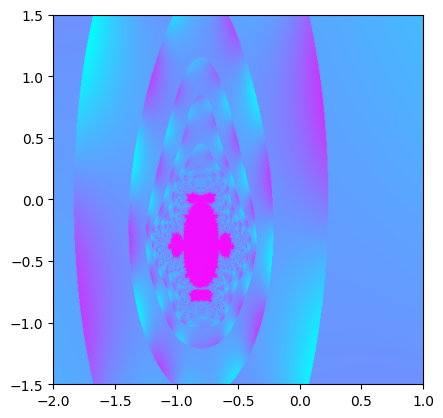

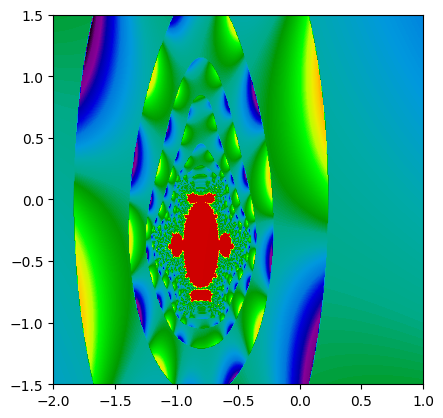

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyoctonion import Octonion

def calculate_z(c, max_iter):
    z = c
    for n in range(max_iter):
        if z.norm > 8:
            return n,z
        z = z*z + c
    return max_iter,z

# Change these values to change the region displayed and the number of iterations used in the calculations
left, right, bottom, top = -2.0, 1.0, -1.5, 1.5
res = 500 # Resolution
max_iter = 255

real = np.linspace(left, right, res)
i1 = np.linspace(bottom, top, res)

# Create an empty image with the same size as our fractal
image = np.empty((res,res))

p = 0
for r in range(res):
    for ii1 in range(res):
        if p != r and r % 100 == 0:
            print(p)
            p = r
        # Use the real and imaginary parts of each point in our grid to calculate a color using one of our functions
        image[r,ii1],z = calculate_z(Octonion(real[r],  i1[ii1], i1[ii1]+.1, i1[ii1]+.2, i1[ii1]+.3, i1[ii1]+.4, i1[ii1]+.5, i1[ii1]+.6), max_iter)
        image[r,ii1] += z.x_0
        image[r,ii1] += z.x_1
        image[r,ii1] += z.x_2
        image[r,ii1] += z.x_3
        image[r,ii1] += z.x_4
        image[r,ii1] += z.x_5
        image[r,ii1] += z.x_6
        image[r,ii1] += z.x_7
        
# Display the fractal
plt.imshow(image, cmap='cool', extent=(left, right, bottom, top))
plt.show()
plt.imshow(image, cmap='nipy_spectral', extent=(left, right, bottom, top))
plt.show()



## Quaternions
Warning: ComplexWarning: Casting complex values to real discards the imaginary part

0
100
200
300


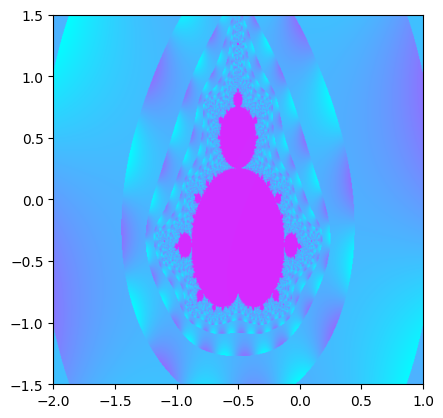

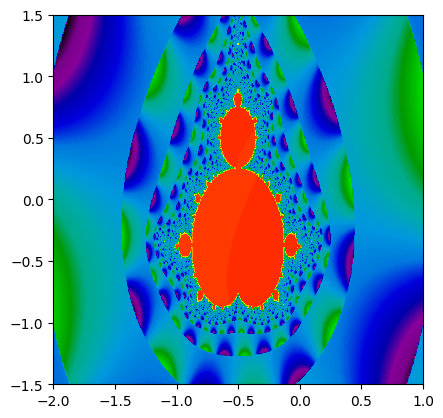

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
import warnings
warnings.filterwarnings('ignore')

def calculate_z(c, max_iter):
    z = c
    for n in range(max_iter):
        #print(z.norm)
        if z.norm > 8:
            return n,z
        z = z*z + c
    return max_iter,z

# Change these values to change the region displayed and the number of iterations used in the calculations
left, right, bottom, top = -2.0, 1.0, -1.5, 1.5
res = 500 # Resolution
max_iter = 255

real = np.linspace(left, right, res)
i1 = np.linspace(bottom, top, res)

# Create an empty image with the same size as our fractal
image = np.empty((res,res))

b = complex(0.5,0.5)

p = 0
for r in range(res):
    for ii1 in range(res):
        if p != r and r % 100 == 0:
            print(p)
            p = r
        # Use the real and imaginary parts of each point in our grid to calculate a color using one of our functions
        image[r,ii1], z = calculate_z(Quaternion(real[r],  i1[ii1], i1[ii1]+.1j, i1[ii1]+.2j), max_iter)
        image[r,ii1] += z.w
        image[r,ii1] += z.x
        image[r,ii1] += z.y
        image[r,ii1] += z.z

plt.imshow(image, cmap='cool', extent=(left, right, bottom, top))
plt.show()
plt.imshow(image, cmap='nipy_spectral', extent=(left, right, bottom, top))
plt.show()